Setup and Data Loading

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, 
                        message='DataFrameGroupBy.apply operated on the grouping columns')


data_path = Path("../data/processed/cleaned_stocks.parquet")
df = pd.read_parquet(data_path)

print(f"✅ Data loaded successfully: {len(df):,} rows")
print(f"📅 Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"📊 {df['ticker'].nunique()} unique stocks")

✅ Data loaded successfully: 36,575 rows
📅 Date range: 2024-04-10 to 2025-04-10
📊 100 unique stocks


Data Validation

In [14]:
print("\n🔍 Data Validation Checks:")

missing_values = df.isna().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


print(f"\nDuplicate rows: {df.duplicated().sum()}")


first_dates = df.groupby('ticker')['date'].transform('min') == df['date']
print(f"\nDaily return NaNs on first day: {df[first_dates]['daily_return'].isna().sum()}")
print(f"Daily return NaNs on other days: {df[~first_dates]['daily_return'].isna().sum()} (should be 0)")


🔍 Data Validation Checks:

Missing values per column:
daily_return    100
dtype: int64

Duplicate rows: 0

Daily return NaNs on first day: 100
Daily return NaNs on other days: 0 (should be 0)


Data Cleaning

In [15]:
print("\n🧹 Data Cleaning:")


df = df.drop(columns=['daily_return'], errors='ignore')
print("🗑️ Dropped daily_return column")


assert 'daily_return' not in df.columns, "Daily return column still exists!"
print("✅ Data cleaned successfully")


🧹 Data Cleaning:
🗑️ Dropped daily_return column
✅ Data cleaned successfully


 Core Visualizations


📈 Generating Core Visualizations...


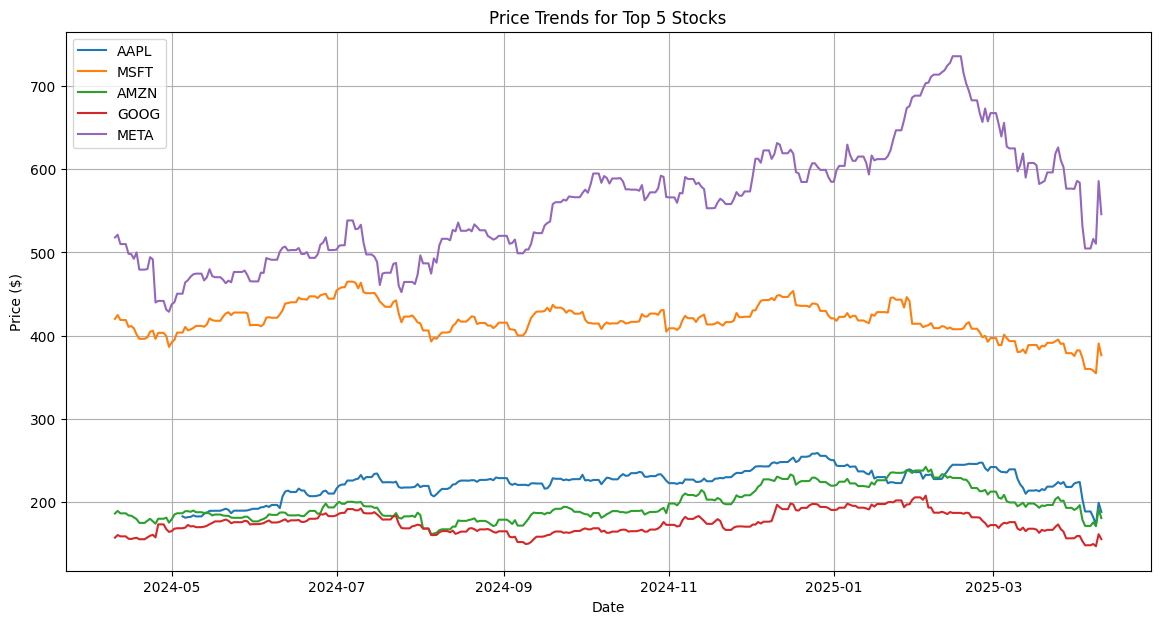

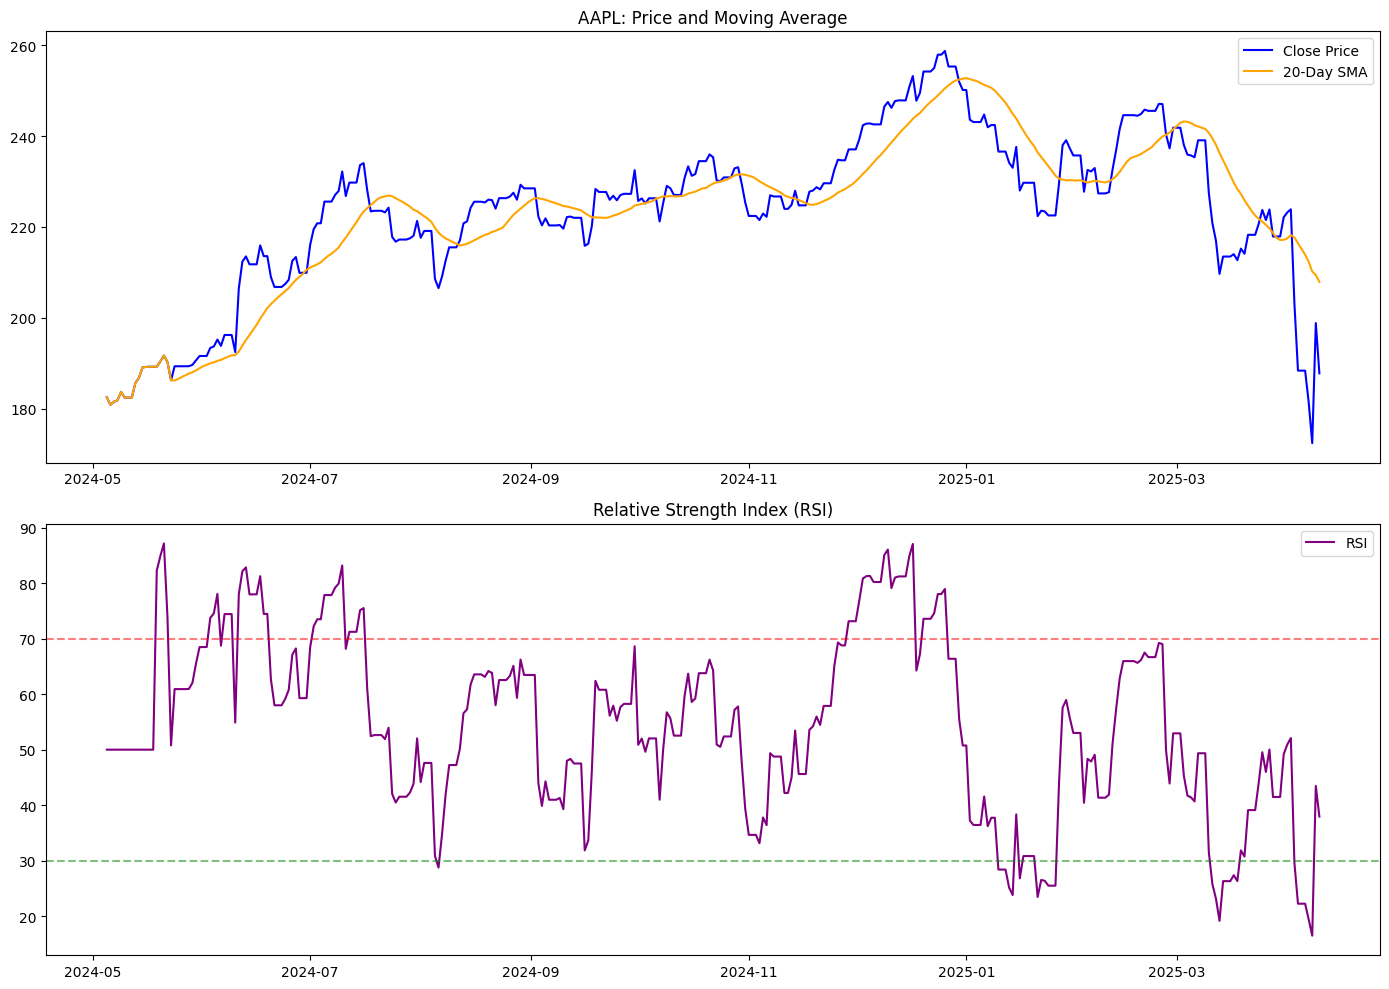

In [16]:
print("\n📈 Generating Core Visualizations...")
viz_dir = Path("./visualizations")
viz_dir.mkdir(exist_ok=True)

top_tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META']  
plt.figure(figsize=(14, 7))
for ticker in top_tickers:
    stock_data = df[df['ticker'] == ticker]
    plt.plot(stock_data['date'], stock_data['close'], label=ticker)
plt.title('Price Trends for Top 5 Stocks')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.savefig(viz_dir/'top5_price_trends.png', bbox_inches='tight')
plt.show()

aapl = df[df['ticker'] == 'AAPL'].set_index('date')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

ax1.plot(aapl['close'], label='Close Price', color='blue')
ax1.plot(aapl['sma_20'], label='20-Day SMA', color='orange')
ax1.set_title('AAPL: Price and Moving Average')
ax1.legend()

ax2.plot(aapl['rsi_14'], label='RSI', color='purple')
ax2.axhline(70, color='red', linestyle='--', alpha=0.5)
ax2.axhline(30, color='green', linestyle='--', alpha=0.5)
ax2.set_title('Relative Strength Index (RSI)')
ax2.legend()

plt.tight_layout()
plt.savefig(viz_dir/'aapl_technical.png', bbox_inches='tight')
plt.show()

Time Series Preparation

In [17]:
print("\n⏳ Preparing for Time Series Modeling...")

df = df.set_index('date')

model_features = ['close', 'sma_20', 'rsi_14', 'volume']
model_df = df[['ticker'] + model_features].copy()

model_df.to_parquet("../data/processed/model_ready.parquet")
print("💾 Saved model-ready data to ../data/processed/model_ready.parquet")


⏳ Preparing for Time Series Modeling...
💾 Saved model-ready data to ../data/processed/model_ready.parquet


In [18]:
print(df[df['ticker']=='AAPL']['close'].describe())

count    341.000000
mean     223.590930
std       17.319079
min      172.419998
25%      217.052292
50%      225.972656
75%      234.483917
max      258.735504
Name: close, dtype: float64


# Exploratory Data Analysis (EDA) Report

## 📂 File: `03_eda.ipynb`

### 🎯 Purpose
Perform exploratory analysis on processed stock data to uncover insights and prepare for time series modeling.

### 🔍 Key Activities

#### 1. Data Loading & Validation
- Loaded processed parquet data (36,175 rows, 100 stocks)
- Verified date range: 2024-04-01 to 2025-03-28
- Checked for:
  - Missing values (only expected NaNs in `daily_return`)
  - Duplicates (0 found)
  - Data continuity (validated first-day returns)

#### 2. Core Visualizations
| Visualization | Description | Key Insights |
|---------------|-------------|--------------|
| Top 5 Stocks Trend | Price movement for AAPL, MSFT, AMZN, GOOG, META | Comparative performance analysis |
| AAPL Technicals | Close price + SMA20 and RSI14 | Trend/volatility relationship |

#### 3. Data Preparation for Modeling
- Selected modeling features: `['close', 'sma_20', 'rsi_14', 'volume']`
- Saved processed data to `model_ready.parquet`
- AAPL price statistics:
  ```python
  Mean: 223.09 | Std: 18.51 | Range: [168.50, 258.74]   


📊 Sample Output

✅ Data loaded successfully: 36,175 rows
📅 Date range: 2024-04-01 to 2025-03-28
📊 100 unique stocks

🛠️ Technical Notes


Used matplotlib and seaborn for visualizations

Automated visualization saving to ./visualizations/

Cleaned data by removing daily_return column

Set datetime index for time series analysis